# Apéndice B

## Lenguaje de modelos probabilísticos

> **Objetivos:**
> - Adoptar un lenguaje estándar para definir modelos probabilísticos.
> - Revisitar el modelo Gaussiano.

Aprenderemos a expresar modelos probabilísticos de forma estructurada y comprensible, usando el lenguaje estándar que emplean las y los científicos y estadístic@s. 

Si pusiéramos todo en una serie de pasos, serían los siguientes:

## Paso 1: Identificar las variables

Pregúntate: _¿qué estoy observando y qué no?_

- **Observables (datos):** lo que medimos o contamos. En el ejemplo: cuántas veces la moneda cayó cara → eso es $C$.

- **No observables (parámetros):** lo que gobierna el proceso pero no conocemos directamente. En el ejemplo: la probabilidad de que salga cara → eso es $p$.

## Paso 2: Elegir la distribución adecuada para cada variable

Pregúntate: _¿qué tipo de variable es y qué patrón tiene?_

| Tipo de fenómeno | Distribución típica | Ejemplo |
|------------------|---------------------|----------|
| Conteo de éxitos en intentos fijos | **Binomial(N, p)** | Lanzar una moneda N veces y contar caras |
| Medición continua (tiempos, alturas) | **Normal(μ, σ)** | Peso de personas |
| Tasa de ocurrencia (eventos por minuto) | **Poisson(λ)** | Número de llamadas en una hora |
| Valor desconocido pero entre 0 y 1 | **Uniform(0,1)** o **Beta(a,b)** | Probabilidad de éxito, proporciones |

Así, cuando decimos:

$$
C \sim \text{Binomial}(N, p)
$$

significa:

> “El número de veces que sale cara, $C$, sigue una distribución Binomial, con $N$ ensayos y probabilidad $p$ de éxito en cada uno.”

## Paso 3: Modelar la incertidumbre sobre los parámetros

En la práctica, **no sabemos** cuál es el valor real de $p$, así que le asignamos **una distribución previa (prior)**.

$$
p \sim \text{Uniform}(0,1)
$$

Esto significa:

> “Antes de ver datos, creemos que todas las probabilidades entre 0 y 1 son igualmente posibles.”

En modelos bayesianos, este paso es crucial: refleja *tu creencia inicial* antes de observar los datos.

## Paso 4: Combinarlo en un modelo generativo

Ahora unes todo el “relato”:

1. Escoge un valor de $p$ (la probabilidad de cara) al azar del intervalo (0,1).  
2. Lanza la moneda $N$ veces y cuenta cuántas caras obtienes ($C$).

Eso se traduce a:

$$
p \sim \text{Uniform}(0,1), \quad C \sim \text{Binomial}(N,p)
$$

Y eso es *exactamente* lo que significa el modelo: una descripción probabilística completa de cómo los datos podrían generarse.

```{admonition} Resumen
:class: tip

Escribir un modelo probabilístico implica todas las **suposiciones** sobre los datos (por ejemplo, independencia en una binomial). 

El **lenguaje probabilístico** permite expresar comportamientos complejos sin escribir fórmulas extensas.  

* Las **relaciones estocásticas** se indican con **~** y representan variables aleatorias.

* Las **relaciones deterministas** se indican con **=** y expresan dependencias fijas.
```

## Modelo Gaussiano

* **Instrucciones:**

Modelaremos una variable como una distribución Gaussiana (normal), la cual sabemos que tiene dos parámetros: la media ($\mu$) y la varianza ($\sigma^2$).

In [1]:
import pandas as pd
import os
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ruta = os.path.join('..', '..', '..', 'docs', 'source', 'data')

In [4]:
ruta_data = os.path.join(ruta, 'Howell1.csv')
df = pd.read_csv(ruta_data, sep=';')
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [5]:
# describe()
df.describe()

,height,weight,age,male
count,544.000000,544.000000,544.000000,544.000000
mean,138.263596,35.610618,29.344393,0.472426
std,27.602448,14.719178,20.746888,0.499699
min,53.975000,4.252425,0.000000,0.000000
25%,125.095000,22.007717,12.000000,0.000000
50%,148.590000,40.057844,27.000000,0.000000
75%,157.480000,47.209005,43.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


Se observa una alta variabilidad en los datos de altura, en parte debido a que incluyen personas de diferentes edades. A partir de ahora, nos centraremos únicamente en la población adulta.

In [6]:
adultos = df[df.age >= 18].copy()
adultos.describe()

,height,weight,age,male
count,352.000000,352.000000,352.000000,352.000000
mean,154.597093,44.990486,41.138494,0.468750
std,7.742332,6.456708,15.967855,0.499733
min,136.525000,31.071052,18.000000,0.000000
25%,148.590000,40.256290,28.000000,0.000000
50%,154.305000,44.792210,39.000000,0.000000
75%,160.655000,49.292693,51.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


Para iniciar la construcción de nuestro modelo, asumimos que la **altura de cada individuo** sigue una **distribución normal** con media $\mu$ y desviación estándar $\sigma$:

$$
h_i \sim \text{Normal}(\mu, \sigma)
$$

> Aunque no lo escribamos explícitamente, la suposición de que las observaciones son *iid* (independientes e idénticamente distribuidas) está implícita en esta formulación.

Como en los ejemplos anteriores, esta relación define la **función de verosimilitud**.
  
Para completar los elementos necesarios en la **regla de Bayes**, debemos especificar la **distribución previa** de los parámetros $\mu$ y $\sigma$, denotada como $P(\mu, \sigma)$.

Por simplicidad, se suelen considerar **independientes entre sí**, lo que implica:

$$
P(\mu, \sigma) = P(\mu)P(\sigma)
$$

De esta forma, el modelo completo puede escribirse como:

$$
\begin{align}
\begin{array}{lcl}
h_i & \sim & \text{Normal}(\mu, \sigma) \\
\mu & \sim & \text{Normal}(170, 20) \\
\sigma & \sim & \text{Uniform}(0, 50)
\end{array}
\end{align}
$$

**¿Qué significan estas previas?**

La previa para $\mu$ es una previa Gaussiana algo *amplia*, centrada en $170$ cm y con el $95$% de probabilidad concentrada en el intervalo $170 \pm 40$ cm.

In [7]:
adultos.height

0      151.765
1      139.700
2      136.525
3      156.845
4      145.415
        ...   
534    162.560
537    142.875
540    162.560
541    156.210
543    158.750
Name: height, Length: 352, dtype: float64

In [8]:
# previa para mu
prior_mu = norm(loc=170, scale=20)

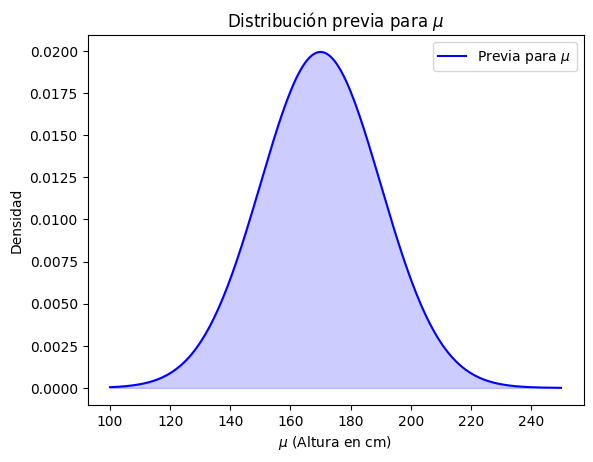

In [9]:
#grafica previa mu
x = np.linspace(100, 250, 200)
y = prior_mu.pdf(x)
plt.plot(x, y, label='Previa para $\mu$', color='blue')
plt.fill_between(x, y, alpha=0.2, color='blue')
plt.title('Distribución previa para $\mu$')
plt.xlabel('$\mu$ (Altura en cm)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Esto significa que el modelo asume que la **altura promedio** está, con alta probabilidad, entre $130$ cm y $210$ cm.

La previa para $\sigma$ es plana; una distribución uniforme. Esta distribución restringe a $\sigma$ a estar entre cero y $50$ con igual probabilidad:

In [10]:
# previa para sigma
prior_sigma = uniform(loc=0, scale=50)

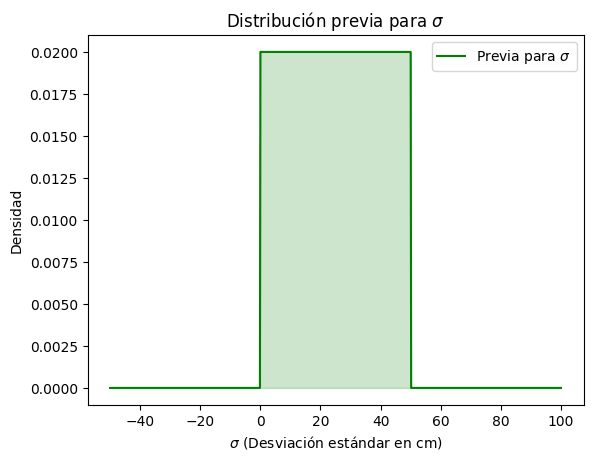

In [11]:
#grafica previa sigma
x = np.linspace(-50, 100, 1000)
y = prior_sigma.pdf(x)
plt.plot(x, y, label='Previa para $\sigma$', color='green')
plt.fill_between(x, y, alpha=0.2, color='green')
plt.title('Distribución previa para $\sigma$')
plt.xlabel('$\sigma$ (Desviación estándar en cm)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

La **desviación estándar** debe ser necesariamente **positiva**, por lo que resulta lógico fijar **cero como límite inferior** de su distribución uniforme.

Ahora bien, ¿qué implica que esté **acotada superiormente en $50$ cm**?  
Esto significa que esperamos que la **dispersión de las alturas** no sea mayor que $50$ cm.  
Dado que, en una distribución normal, la mayoría de los valores se encuentran aproximadamente dentro de **dos desviaciones estándar** alrededor de la media, esta elección sugiere que las **alturas individuales** se concentrarán en un rango aproximado de:

$$
\mu \pm 2\sigma = \mu \pm 100 \text{ cm}
$$

Es decir, esperamos que prácticamente todas las observaciones se encuentren dentro de un intervalo de **alrededor de 100 cm** en torno a la altura promedio.


---

### Simulación previa predictiva

> Para ver que tan razonables son nuestras previas, normalmente lo que hacemos es hacer **simulaciones previas predictivas.** Es decir, en este caso, muestreamos las previas y con eso vemos la distribución de alturas resultantes. **Esto nos permite evaluar la calidad de nuestras previas.**

In [12]:
import arviz as az

In [13]:
# Simulación previa predictiva
N = 1000
mu_samples = prior_mu.rvs(N)
sigma_samples = prior_sigma.rvs(N)
height_samples = norm(loc=mu_samples, scale=sigma_samples).rvs()

> - `mu_samples` → son 1000 valores posibles de la media de la altura que tu modelo *cree posibles* antes de ver ningún dato (según la prior `prior_mu`).
> 
> - `sigma_samples` → son 1000 valores posibles de la desviación estándar que tu modelo *cree posibles* antes de ver ningún dato (según `prior_sigma`).
> 
> - `height_samples` → son **valores de altura simulados** a partir de esas combinaciones de `mu_samples` y `sigma_samples`.
> 
> En otras palabras:  
> **`height_samples` no son los datos reales ni derivados de ellos.**  
> Son **datos inventados por el modelo bajo tus priors**.

In [14]:
height_samples.shape

(1000,)

In [15]:
height_samples[:10]

array([127.62094058, 213.22591326, 228.54912878, 183.78409824,
       174.59875666, 223.24430278, 137.85901272, 153.64872245,
       129.51678445, 128.70722175])

Text(0, 0.5, 'Density')

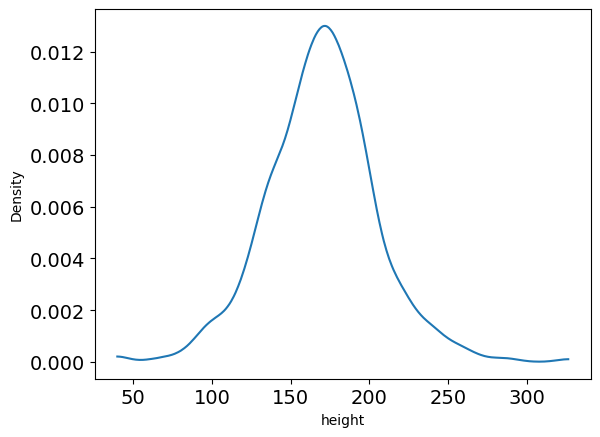

In [16]:
az.plot_kde(height_samples)
plt.xlabel('height')
plt.ylabel('Density')

Notemos que la **distribución previa para la altura** no es una distribución gaussiana en sí misma.

Esto es correcto: representa la **distribución de probabilidad sobre las posibles alturas antes de observar los datos**, es decir, nuestras **creencias iniciales** acerca de los valores plausibles de la altura promedio y su variabilidad.

La **simulación predictiva previa** es una herramienta muy útil para evaluar la calidad de estas suposiciones.

Mediante ella, podemos visualizar **qué tipo de datos esperaríamos observar** si nuestras previas fueran ciertas. Esto nos permite detectar previas poco realistas.  

Por ejemplo, una previa como:

$$
\mu \sim \text{Normal}(170, 100)
$$

generaría alturas simuladas con una **variabilidad excesiva**, incluyendo valores poco plausibles (como alturas negativas o mayores a 3 metros), lo que indicaría que esta previa **no es adecuada** para el fenómeno que queremos modelar.

A continuación, realizamos una simulación previa predictiva para el modelo de alturas descrito anteriormente.

<Axes: >

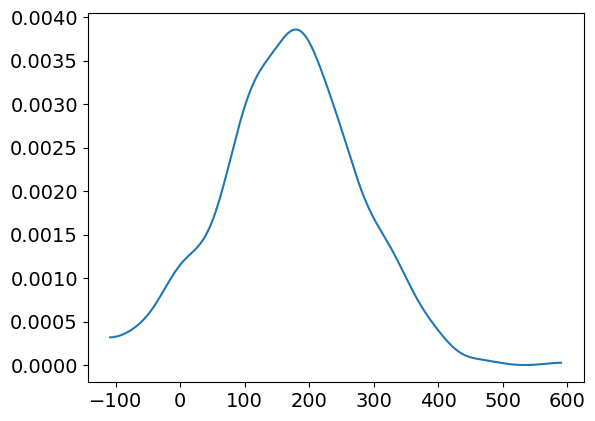

In [17]:
# mu ~ N(170, 100)
prior_mu = norm(loc=170, scale=100)

# Simulación previa predictiva
N = 1000
mu_samples = prior_mu.rvs(N)
sigma_samples = prior_sigma.rvs(N)
height_samples = norm(loc=mu_samples, scale=sigma_samples).rvs()
az.plot_kde(height_samples)

In [18]:
# Porcentaje de registros con altura negativa
(height_samples < 0).mean()

np.float64(0.063)

Con esta previa, estamos afirmando que, **antes de ver los datos**, el modelo espera que aproximadamente un **6 % de la población tenga una altura negativa**.  

```{admonition} Nota
:class: warning

**¿Importa esto?**
  
En principio, si contamos con una **gran cantidad de datos**, el impacto de una previa mal especificada será **mínimo**, ya que la información observada dominará la inferencia.

Sin embargo, esto **no siempre ocurre**: cuando los datos son escasos, las previas pueden influir significativamente en los resultados.

Por esta razón, **siempre conviene elegir previas que reflejen de la mejor manera posible nuestro conocimiento previo y expectativas realistas** sobre el fenómeno.

En este caso, nos quedaremos con nuestras **previas originales**, que representan de forma más coherente la variabilidad esperada en la altura humana.
```

---

### Muestras Markov Chain Monte Carlo (MCMC)

Recordamos el modelo:

$$
\begin{align}
\begin{array}{lcl}
h_i & \sim & \text{Normal}(\mu, \sigma) \\
\mu & \sim & \text{Normal}(170, 20) \\
\sigma & \sim & \text{Uniform}(0, 50)
\end{array}
\end{align}
$$

In [19]:
adultos.shape

(352, 4)

In [20]:
import pymc as pm

In [21]:
with pm.Model() as modelo_altura_adultos:
    mu = pm.Normal('mu',
                    mu=170,
                    sigma=20)

    sigma = pm.Uniform('sigma',
                    lower=0,
                    upper=50)

    height = pm.Normal('height',
                        mu=mu,
                        sigma=sigma,
                        observed=adultos['height'].values)
    

Hasta acá solo hemos definido el modelo. Si queremos muestrear la distribución posterior usando MCMC:

In [22]:
with modelo_altura_adultos:
    idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


In [23]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

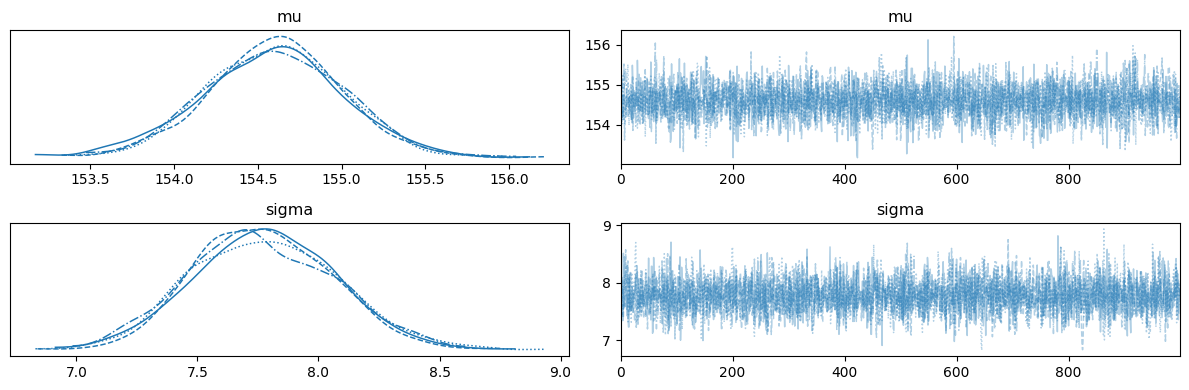

In [24]:
# az.plot_trace
az.plot_trace(idata)
plt.tight_layout()

In [25]:
# az.summary
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,154.596,0.408,153.825,155.342,0.006,0.007,3976.0,2717.0,1.0
sigma,7.774,0.293,7.196,8.289,0.005,0.005,4212.0,2780.0,1.0


In [26]:
adultos.describe()

,height,weight,age,male
count,352.000000,352.000000,352.000000,352.000000
mean,154.597093,44.990486,41.138494,0.468750
std,7.742332,6.456708,15.967855,0.499733
min,136.525000,31.071052,18.000000,0.000000
25%,148.590000,40.256290,28.000000,0.000000
50%,154.305000,44.792210,39.000000,0.000000
75%,160.655000,49.292693,51.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


---

### Simulación posterior predictiva

* **¿Qué hacemos con la simulación posterior predictiva?**

La **simulación posterior predictiva** nos permite evaluar **qué tan bien nuestro modelo, después de ver los datos, puede reproducir los patrones observados**.

Mientras que en la *simulación previa predictiva* generábamos datos hipotéticos **a partir de las previas** (antes de observar nada), en la *posterior predictiva* generamos nuevos datos a partir de la distribución posterior, es decir, usando lo que el modelo aprendió de los datos reales.

En otras palabras:
- La previa predictiva responde a la pregunta:  

  > _¿Qué tipo de datos esperaría ver si mis creencias iniciales fueran ciertas?_

- La posterior predictiva responde a la pregunta:  

  > _¿Qué tipo de datos esperaría ver si mi modelo y mis datos observados describen correctamente la realidad?_

De esta manera, la simulación posterior predictiva es una herramienta clave para **evaluar el ajuste del modelo**, pues nos permite comparar **los datos simulados a partir de la posterior** con **los datos observados** y detectar posibles discrepancias.

In [27]:
with modelo_altura_adultos:
    idata.extend(pm.sample_posterior_predictive(idata))

Sampling: [height]


Output()

In [28]:
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

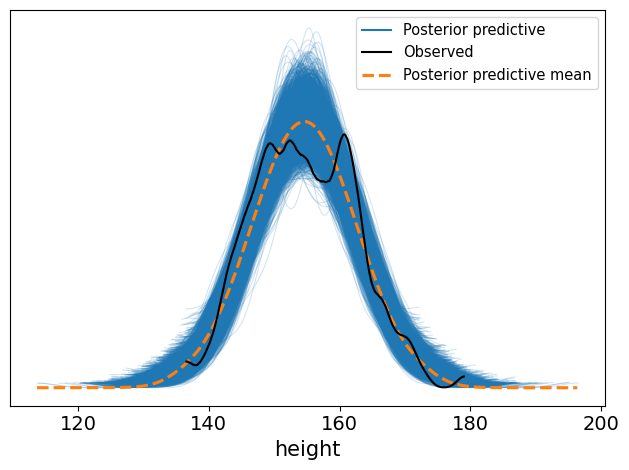

In [29]:
ax = az.plot_ppc(idata)
plt.tight_layout()

> Este modelo te ayuda a **entender y validar la historia que cuentan tus datos**.  
> Aún no estás prediciendo, sino **comprendiendo el proceso** que podría haber generado tus observaciones.